# 1. Import Libraries

In [1]:
# Import Tensorflow
import tensorflow as tf

# To Perform algebraic analysis
import numpy as np

# For visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Initializing Weight and Bias

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.1 Dimensions for Weights and Biases </b></p>
</div>


<center> <img src="https://miro.medium.com/max/640/1*26kekwGdstqXxglSm0fBFg.png" title="Dimensions for Weights and Biases"> </center>

**<span style="color:#023e8a;"> Here, </span>**
* `nˡ` is the **number of neurons in layer l**
 
 
<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.2 tensorflow.random.normal() </b></p>
</div>
 
 **<span style="color:#023e8a;"> Weights and Bias are initialized using `Normal Distribution` with mean `0` and standard deviation `1` </span>**
 
```python
tf.random.normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.float32,
    seed=None,
    name=None,
)
```
**<span style="color:#023e8a;"> Outputs random values from a normal distribution. </span>**

In [2]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        
        self.number_feature = layers[0]
        self.number_class = layers[-1]
        
        self.w = {}
        self.b = {}
        
        self.dw = {}
        self.db = {}
        
        self.setup()
    
    # Weight and Bias Initialization
    def setup(self):
        for i in range(1, self.L):
            self.w[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], 1)))

# 3. Forward Propagation

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.1 4-layer Neural Network</b></p>
</div>

<center> <img src = "https://miro.medium.com/max/720/1*sSIeU-WhsuHCQlOA00IBXg.jpeg">
</center>

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.2 Forward Propagation Equations</b></p>
</div>

<center> <img src = "https://miro.medium.com/max/720/1*51X_xj8p-jO8-plMfsyajg.png">
    </center>
    
**<span style="color:#023e8a;"> Here, </span>**
* `x` is the **input vector**
* `z` is the **output i.e weighted sum at the neurons**
* `a` is the **activation functions**, 
* `s` is the **predicted output**

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.3 Matrix Multiplication</b></p>
</div>

```python
tf.matmul(
    a,
    b,
    transpose_a=False,
    transpose_b=False,
    adjoint_a=False,
    adjoint_b=False,
    a_is_sparse=False,
    b_is_sparse=False,
    output_type=None,
    name=None,
)
```
**<span style="color:#023e8a;"> Multiplies matrix `a` by matrix `b`, producing `a` * `b`. </span>**
<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>3.4 ReLu Activation</b></p>
</div>

```python
tf.nn.relu(features, name=None)
```
**<span style="color:#023e8a;"> Computes rectified linear: `max(features, 0)`. </span>**

In [3]:
class NeuralNetwork(NeuralNetwork):
    def forwardPass(self, A):
        A = tf.convert_to_tensor(A, dtype=tf.float32)
        for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.w[i])) + tf.transpose(self.b[i])
            # To handle index mismatching
            if i != self.L - 1:
                A = tf.nn.relu(Z)
            else:
                A = Z
        
        return A

# 4. Back Propagation

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.1 Cost Function </b></p>
</div>

<center><img src="https://miro.medium.com/max/400/1*f8CwUGDguGaqCh-qvtW7lA.png"></center>

**<span style="color:#023e8a;"> Here, </span>**
* `C` is the **cost function**
* `s` is the **predicted ouput**
* `y` is the **actual output**

**<span style="color:#023e8a;"> Cost Function can be MSE, cross-entropy or any other cost function. </span>**

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.2 Gradient Calculation </b></p>
</div>
<center><div style="color:white;
            height: 30px;
            width: 350px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>4.2.1  Gradient for single weight (w_jk)^l: </b></p>
</div>
</center>
<center><img src = "https://miro.medium.com/max/720/1*RiYDrF5DgmbNubMq9x_czA.png"></center>

<center><div style="color:white;
            height: 30px;
            width: 350px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>4.2.2  Gradient for bias (b_j)^l: </b></p>
</div>
</center>
<center><img src = "https://miro.medium.com/max/1400/1*Xpco_RAhSlM9z5q6VSdy6Q.png"></center>

<center><div style="color:white;
            height: 30px;
            width: 350px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>4.2.3 Common Part - Local Gradient: </b></p>
</div>
</center>
<center><img src = "https://miro.medium.com/max/640/1*WQz6hHI1ymFlVCYwtIBdaQ.png"></center>

<center><div style="color:white;
            height: 30px;
            width: 350px;
            border-radius:20px 20px;
            background-color:#5BB318;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>4.2.4 Visual representation of backpropagation: </b></p>
</div>
</center>
<br>

<center><img src = "https://miro.medium.com/max/720/1*CxdjKFrE-Vww0KmI-3Z5sA.png"></center>

**<span style="color:#023e8a;">Weight W<sub>22</sub><sup>(2)</sup> connects a<sub>2</sub><sup>(2)</sup> and z<sub>2</sub><sup>(2)</sup>, so computing the gradient requires applying the chain rule through z<sub>2</sub><sup>(3)</sup> and a<sub>2</sub><sup>(3)</sup>:</span>**

<center><img src = "https://miro.medium.com/max/720/1*65rk0JpGEi6q0n2t6C688Q.png"></center>

**<span style="color:#023e8a;">To calculate the final value of derivative of C in a<sub>2</sub><sup>(3)</sup> requires knowledge of the function C. Since C is dependent on a<sub>2</sub><sup>(3)</sup>, calculating the derivative is fairly straightforward.</span>**

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.3 Update equations for Weights and Biases </b></p>
</div>
    
    
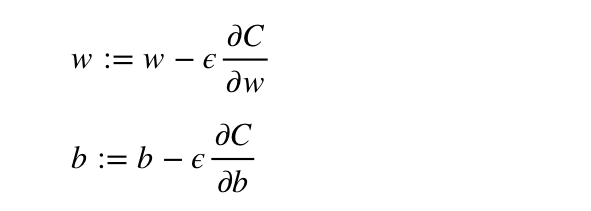


**<span style="color:#023e8a;"> Here, </span>**
* `ϵ` is the **learning rate** — a `hyper-parameter` set by the user. It determines the `rate` at which the `weights` and `biases` are `updated`
* Essentially, `C` is a function of **weights**, `w` and **biases**, `b`

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.4 tensorflow.reduce_mean()</b></p>
</div>

```python
tf.reduce_mean(input_tensor, axis=None, keepdims=False, name=None)
```
**<span style="color:#023e8a;"> Computes the mean of elements across dimensions of a tensor. </span>**

* Unless `keepdims` is true, the rank of the tensor is reduced by 1 for each
of the entries in `axis`, which must be unique. 
    * If `keepdims` is true, the reduced dimensions are retained with length 1.

* If `axis` is None, all dimensions are reduced, and a tensor with a single
element is returned.

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>4.5 tensorflow.nn.softmax_cross_entropy_with_logits()</b></p>
</div>

```python
tf.nn.softmax_cross_entropy_with_logits(labels, logits, axis=-1, name=None)
```

**<span style="color:#023e8a;"> Computes softmax cross entropy between `logits` and `labels`. Measures the `probability error` in `discrete classification` tasks in which the
`classes` are `mutually exclusive` (each entry is in exactly one class). If using exclusive `labels` (wherein one and only one class is true at a time), can be used `sparse_softmax_cross_entropy_with_logits`.</span>**


**<span style="color:#023e8a;"> Example : </span>**
* ```python
logits = [[4.0, 2.0, 1.0], [0.0, 5.0, 1.0]]
labels = [[1.0, 0.0, 0.0], [0.0, 0.8, 0.2]]
```
* ```python
tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
```
* returns
```python
<tf.Tensor: shape=(2,), dtype=float32,
numpy=array([0.16984604, 0.82474494], dtype=float32)>
```



In [4]:
# To compute the loss and upgrading  the parameters : Weight and Bias
class NeuralNetwork(NeuralNetwork):
    
    def compute_loss(self, A, Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A))
    
    def upgrade_parameters(self, lr):
        for i in range(1, self.L):
            # Updating parameters by subtracting gradient times learning_rate
            self.w[i].assign_sub(lr * self.dw[i])
            self.b[i].assign_sub(lr * self.db[i])

# 5. Predict and Neural Network Information

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.1 tensorflow.argmax() </b></p>
</div>

```python
 tf.argmax(input, axis=None, output_type=tf.int64, name=None)
```
**<span style="color:#023e8a;"> Returns the index with the largest value across axes of a tensor. In case of `identity` returns the `smallest index`. </span>**


<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.2 tensorflow.nn.softmax() </b></p>
</div>

```python
 tf.nn.softmax(logits, axis=None, name=None)
```
**<span style="color:#023e8a;"> Computes softmax activation. </span>**

* Used for `multi-class predictions`. The `sum` of `all outputs` generated by softmax
is `1`.

* This function performs :

    ```python
softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
```

**<span style="color:#023e8a;"> Example : </span>**
* ```python
softmax = tf.nn.softmax([-1, 0., 1.])
softmax
```
* returns
```python
<tf.Tensor: shape=(3,), dtype=float32,
numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>
```

In [5]:
class NeuralNetwork(NeuralNetwork):
    
    def predict(self, X):
        A = self.forwardPass(X)
        return tf.argmax(tf.nn.softmax(A), axis=1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.w[i].shape[0] * self.w[i].shape[1]
            num_params += self.b[i].shape[0]
            
        print("Number of Features: {}".format(self.number_feature))
        print("Total No of class is: {}".format(self.number_class))
        
        print("Hidden Layer Information is: ")
        for i in range(1, self.L - 1):
            print("Layer: {}, Units: {}".format(i, self.layers[i]))
            
        print("Total No of Parameters: {}".format(num_params))    

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.3 tensorflow.GradientTape() </b></p>
</div>

```python
tf.GradientTape(persistent=False, watch_accessed_variables=True)
```

**<span style="color:#023e8a;"> Record operations for automatic differentiation.</span>**

**<span style="color:#023e8a;"> Example: </span>**

* consider the function `y = x * x`. The gradient at `x = 3.0` can
be computed as:

    * ```python
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
dy_dx = g.gradient(y, x)
```
    * ```python
print(dy_dx)
tf.Tensor(6.0, shape=(), dtype=float32)
```
* To compute the gradient
    * ```python
g.gradient(
    target,
    sources,
    output_gradients=None,
    unconnected_gradients=<UnconnectedGradients.NONE: 'none'>,
)
```
    * Unless we set `persistent=True`, a GradientTape can only be used to
compute one set of gradients (or jacobians).


* To compute multiple gradients over the same computation, a persistent gradient tape is created. For example:
    * ```python
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x * x
    z = y * y
```
    * ```python
    dz_dx = g.gradient(z, x) # ( 4 * x^3 at x = 3)
    print(dz_dx)
    tf.Tensor(108.0, shape=(), dtype=float32)
```
    * ```python
    dy_dx = g.gradient(y, x)
    print(dy_dx)
    tf.Tensor(6.0, shape=(), dtype=float32)
```

In [6]:
class NeuralNetwork(NeuralNetwork):
    
    def training_on_batch(self, x, y, lr):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        
        # To perform automatic differentiation
        with tf.GradientTape(persistent=True) as tape:
            A = self.forwardPass(x)
            loss = self.compute_loss(A, y)
        
        for key in self.w.keys():
            self.dw[key] = tape.gradient(loss, self.w[key])
            self.db[key] = tape.gradient(loss, self.b[key])
        
        del tape
    
        self.upgrade_parameters(lr)
    
        return loss.numpy()

In [7]:
# Training Start
class NeuralNetwork(NeuralNetwork):
    
    def train(self, x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, lr):
        history = {"val_loss":[],
                  "train_loss":[],
                  "val_acc":[]}
    
        for e in range(0, epochs):
            epochs_loss_train = 0.0
            print("Epochs {}".format(e), end = " | ")
            for i in range(step_per_epochs):
                x_batch = x_train[i * batch_size : (i+1) * batch_size]
                y_batch = y_train[i * batch_size : (i+1) * batch_size]
                # To compute batch loss
                batch_loss = self.training_on_batch(x_batch, y_batch, lr)
                epochs_loss_train += batch_loss
            
                if i % int(step_per_epochs/10) == 0:
                    print(end=" . ")
                
            history['train_loss'].append(epochs_loss_train/step_per_epochs)
        
            valA = self.forwardPass(x_test)
            history['val_loss'].append(self.compute_loss(y_test, valA).numpy())
    
            valPr = self.predict(x_test)
            history['val_acc'].append(np.mean(np.argmax(y_test, axis=1) == valPr.numpy()))
            print("Value Accuracy: ", history['val_acc'][-1])
            
        # Here, we will get training information
        return history

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.4 tensorflow.keras.utils.to_categorical() </b></p>
</div>

```python
tf.keras.utils.to_categorical(
    y, num_classes=None, dtype='float32'
)
```
**<span style="color:#023e8a;">Converts a class vector (integers) to binary class matrix.</span>**

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>5.5 numpy.random.choice() </b></p>
</div>

```python
numpy.random.choice(a, size=None, replace=True, p=None)
```

**<span style="color:#023e8a;">Generates a random sample from a given 1-D array.</span>**

**<span style="color:#023e8a;">Here, </span>**
* `a` is **1-D array** or,  **int** i.e. `a random sample` or `an int` is generated
* `size` is **int** or **tuple of ints**, which is `Output Shape`. Default is `None`,  which returns a single value.

In [8]:
def load_datasets():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784)) / 255.0
    y_train = tf.keras.utils.to_categorical(y_train)
    x_test = np.reshape(x_test, (x_test.shape[0], 784)) / 255.0
    y_test = tf.keras.utils.to_categorical(y_test)
    
    print("X Train Datasets Shape: {}".format(x_train.shape))
    print("Y test Data: {}".format(y_test))
    print("Len of Y Test Datasets: {}".format(len(y_test[0])))
    print("Unique Value is : {}".format(np.argmax(y_test[1])))
    
    return (x_train, y_train), (x_test, y_test)
    
def plot_random_sample(x, y, p=None):
    indices = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis=1)
    
    if p is None:
        p = y
        
    plt.figure(figsize=(10, 4))
    
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.gray()
        
        if y[index] == p[index]:
            col='g'
        else:
            col='r'
            
        plt.xlabel(str(p[index]), color=col)
        
    return plt

In [9]:
(x_train, y_train), (x_test, y_test) = load_datasets()

11501568/11490434 [==============================] - 1s 0us/step
X Train Datasets Shape: (60000, 784)
Y test Data: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Len of Y Test Datasets: 10
Unique Value is : 2


# 6. Visualization

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.1 Random Sample of MNIST data </b></p>
</div>

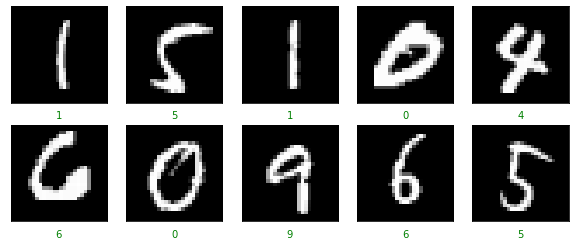

In [10]:
plot_random_sample(x_train, y_train).show()

In [11]:
def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    return plt

In [12]:
network = NeuralNetwork([784, 256, 256, 10]) # 28 * 28

2022-11-10 09:37:46.708526: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
network.info()

Number of Features: 784
Total No of class is: 10
Hidden Layer Information is: 
Layer: 1, Units: 256
Layer: 2, Units: 256
Total No of Parameters: 269322


In [14]:
batch_size = 128
epochs = 20
step_per_epochs = int(x_train.shape[0]/batch_size)

In [15]:
learning_rate = 1e-3

In [16]:
history = network.train(x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, learning_rate)

Epochs 0 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8047
Epochs 1 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8409
Epochs 2 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8607
Epochs 3 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8743
Epochs 4 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8826
Epochs 5 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8875
Epochs 6 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8923
Epochs 7 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8953
Epochs 8 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.8974
Epochs 9 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9001
Epochs 10 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9031
Epochs 11 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9052
Epochs 12 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9055
Epochs 13 |  .  .  .  .  .  .  .  .  .  .  . Value Accuracy:  0.9072
Epochs 14 |  .  .  .  .  .  .  .  .  .  .  .

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.2 Results : Val_loss, Train_loss, Val_acc </b></p>
</div>

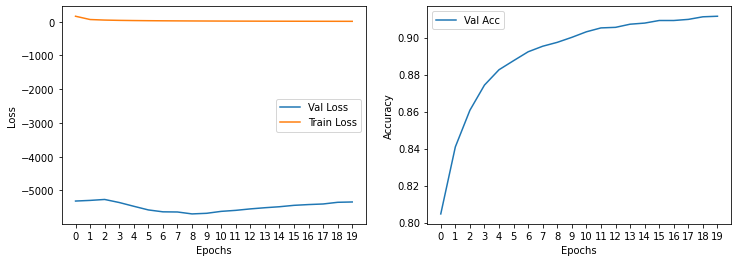

In [17]:
plot_results(history).show()

In [18]:
preds = network.predict(x_test)

<div style="color:white;display:fill;
            background-color:#d34dd2;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>6.3 Model Predicted Sample </b></p>
</div>

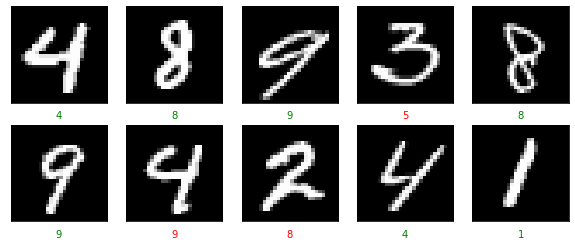

In [19]:
plot_random_sample(x_test, y_test, preds.numpy()).show()

## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Thanks for reading! Please feel free to provide suggestions or feedbacks :)</span></center>**